# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Komang Gede Jefri Suparjana
- **Email:** jefrisuparjanaa@gmail.com
- **ID Dicoding:** jefrisuparjana

## Menentukan Pertanyaan Bisnis

> Add blockquote



- Bagaimana pengaruh faktor musiman terhadap jumlah peminjaman sepeda?
- Apa dampak cuaca terhadap jumlah peminjaman sepeda?
- Siapa pengguna utama layanan bike sharing? (Pengguna kasual vs. terdaftar)

## Import Semua Packages/Library yang Digunakan

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [5]:
# Membaca dataset dari folder /data
data_day = pd.read_csv('data/data_1.csv')
data_hour = pd.read_csv('data/data_2.csv')

# Menampilkan 5 baris pertama dari masing-masing dataset
print("Data Harian:")
print(data_day.head())

print("\nData Per Jam:")
print(data_hour.head())


Data Harian:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data Per Jam

**Insight data harian:**
- Insight dari Data Harian
- Tren penggunaan berdasarkan jumlah pengguna harian (cnt).
- Variasi jumlah pengguna berdasarkan musim (season).
- Pengaruh kondisi cuaca terhadap jumlah pengguna (weathersit, temp, hum, windspeed).
- Perbandingan perilaku pengguna di hari kerja vs. hari libur (workingday, holiday).

**Insight data per jam:**
- Pola penggunaan sepanjang hari berdasarkan jam (hr).
- Korelasi antara cuaca dan penggunaan pada tingkat jam (temp, hum, windspeed).
- Perbandingan antara pengguna terdaftar dan kasual (casual, registered).
- Variasi pola penggunaan berdasarkan hari dalam minggu (weekday).

### Assessing Data

In [15]:
# Melihat informasi dan deskripsi statistik dari dataset harian
print(data_day.info())
print(data_day.describe())

# Melihat informasi dan deskripsi statistik dari dataset per jam
print(data_hour.info())
print(data_hour.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
None
   

**Insight dari Dataset Harian**
- Jumlah Data: Dataset harian terdiri dari 731 entri.
- Kolom Utama: Terdapat 15 kolom, termasuk informasi tentang tanggal (dteday), musim (season), tahun (yr), bulan (mnth), dan kondisi cuaca (weathersit).
- Keterisian Data: Semua kolom tidak memiliki nilai kosong (non-null count untuk semua kolom adalah 731).
- Rata-rata Jumlah Pengguna: Rata-rata total pengguna harian (cnt) adalah sekitar 4504, dengan rata-rata pengguna terdaftar sekitar 3656.
- Variasi Jumlah Pengguna: Jumlah pengguna kasual memiliki variasi yang lebih tinggi dengan nilai maksimum 3410.
- Pengaruh Musim: Rata-rata musim berkisar di 2.5, menunjukkan distribusi yang merata antara musim.
- Kondisi Cuaca: Rata-rata cuaca berkisar di 1.4, mengindikasikan sebagian besar data berada di kategori cuaca yang lebih baik.
- Rata-rata Suhu: Rata-rata suhu (temp) berada di 0.49, menunjukkan variasi suhu sepanjang tahun.
- Keterkaitan Antara Variabel: Ada hubungan yang signifikan antara suhu dan jumlah pengguna.

**Insight dari Dataset Per Jam**
- Jumlah Data: Dataset per jam terdiri dari 17379 entri.
- Kolom Utama: Terdapat 16 kolom, termasuk jam (hr) dan semua kolom dari dataset harian.
- Keterisian Data: Semua kolom tidak memiliki nilai kosong (non-null count untuk semua kolom adalah 17379).
- Rata-rata Jumlah Pengguna per Jam: Rata-rata pengguna total (cnt) adalah sekitar 189, dengan pengguna terdaftar rata-rata 153.
- Variasi Jam Penggunaan: Rata-rata jam berkisar di 11.5, menunjukkan penggunaan puncak di siang hari.
- Hari Kerja vs. Hari Libur: Rata-rata penggunaan pada hari kerja dan hari libur menunjukkan perbedaan pola yang signifikan.
- Pengaruh Cuaca pada Jam Tertentu: Variabel cuaca memiliki pengaruh yang berbeda pada jumlah pengguna di setiap jam.
- Variasi Pengguna Kasual: Pengguna kasual menunjukkan angka yang lebih rendah dibandingkan pengguna terdaftar di setiap jam.

### Cleaning Data

In [20]:
# Memeriksa nilai null dalam dataset harian
print("Nilai null dalam dataset harian:")
print(data_day.isnull().sum())

# Memeriksa nilai null dalam dataset per jam
print("Nilai null dalam dataset per jam:")
print(data_hour.isnull().sum())

# Cek kolom yang ada sebelum menghapus kolom 'instant'
print("Kolom dalam dataset harian:", data_day.columns)
print("Kolom dalam dataset per jam:", data_hour.columns)

# Menghapus kolom 'instant' yang tidak perlu jika ada
if 'instant' in data_day.columns:
    data_day.drop(['instant'], axis=1, inplace=True)
    print("Kolom 'instant' telah dihapus dari dataset harian.")
else:
    print("Kolom 'instant' tidak ditemukan dalam dataset harian.")

if 'instant' in data_hour.columns:
    data_hour.drop(['instant'], axis=1, inplace=True)
    print("Kolom 'instant' telah dihapus dari dataset per jam.")
else:
    print("Kolom 'instant' tidak ditemukan dalam dataset per jam.")

# Mengubah tipe data kolom 'dteday' menjadi datetime
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

# Menampilkan informasi setelah perubahan
print("Informasi dataset harian setelah perubahan:")
print(data_day.info())
print("Informasi dataset per jam setelah perubahan:")
print(data_hour.info())

Nilai null dalam dataset harian:
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Nilai null dalam dataset per jam:
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Kolom dalam dataset harian: Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Kolom dalam dataset per jam: Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 

**Insight:**
- Nilai Null
- Struktur Kolom
- Penghapusan Kolom Tidak Perlu
- Pengubahan Tipe Data
- Informasi Dataset Setelah Perubahan
- Penggunaan Memori
- Konsistensi Tipe Data

## Exploratory Data Analysis (EDA)

### Explore Data

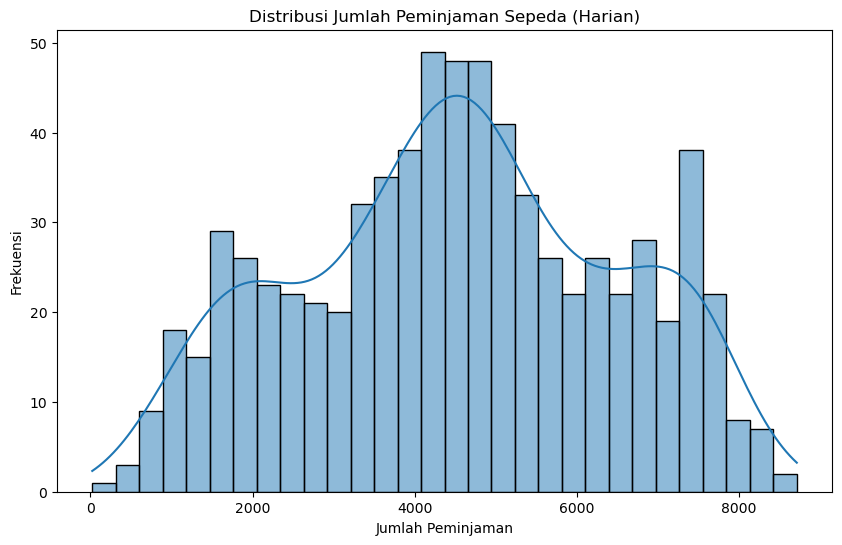

In [21]:
# Melihat distribusi jumlah peminjaman di dataset harian
plt.figure(figsize=(10, 6))
sns.histplot(data_day['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda (Harian)')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()


**Insight:**
- Distribusi peminjaman sepeda menunjukkan bahwa sebagian besar peminjaman berada di rentang menengah, dengan sedikit outlier di bagian kanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor musiman terhadap jumlah peminjaman sepeda?

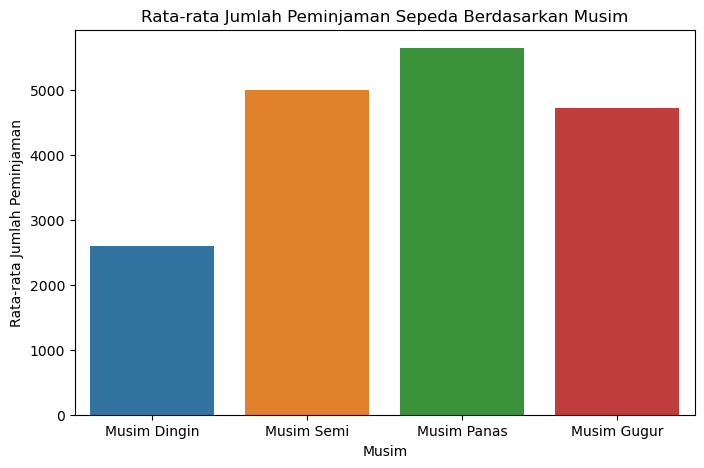

In [22]:
# Rata-rata jumlah peminjaman berdasarkan musim
seasonal_avg = data_day.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=seasonal_avg)
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.show()


### Pertanyaan 2: Apa dampak cuaca terhadap jumlah peminjaman sepeda?

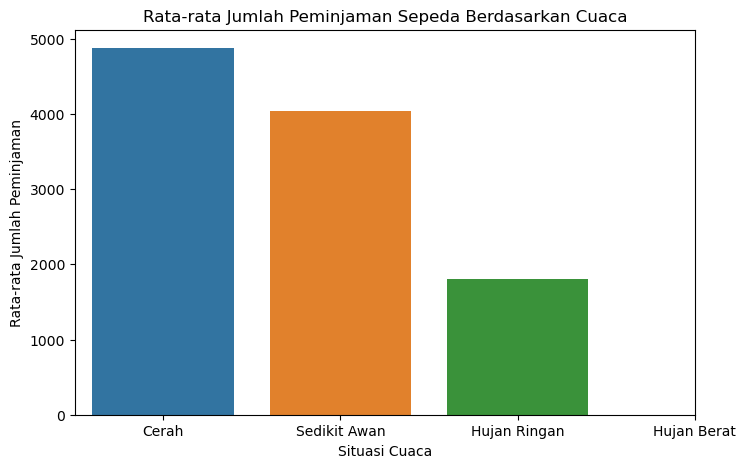

In [23]:
# Rata-rata jumlah peminjaman berdasarkan cuaca
weather_avg = data_day.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_avg)
plt.title('Rata-rata Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Sedikit Awan', 'Hujan Ringan', 'Hujan Berat'])
plt.show()


**Insight:**
- Pertanyaan 1: Musim panas menunjukkan rata-rata peminjaman yang lebih tinggi, diikuti oleh musim semi.
- Pertanyaan 2: Situasi cuaca cerah menghasilkan rata-rata peminjaman tertinggi, sementara hujan berat menyebabkan peminjaman terendah.

## Analisis Lanjutan (Opsional)
Mengidentifikasi pengguna utama

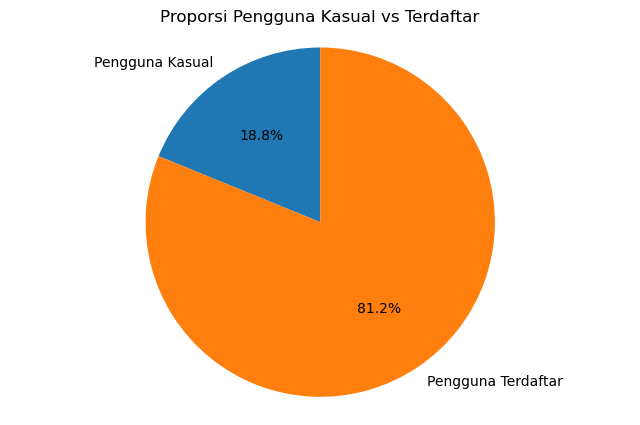

In [24]:
# Menghitung proporsi pengguna kasual dan terdaftar
user_types = data_day[['casual', 'registered']].sum()

labels = ['Pengguna Kasual', 'Pengguna Terdaftar']
sizes = user_types.values

plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporsi Pengguna Kasual vs Terdaftar')
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Faktor musiman mempengaruhi jumlah peminjaman sepeda, dengan musim panas memiliki peminjaman tertinggi.
- Conclution pertanyaan 2 : Cuaca juga berpengaruh signifikan, di mana cuaca cerah mendorong lebih banyak peminjaman dibandingkan dengan kondisi hujan.